## Meta

In [ ]:
options(repr.matrix.max.cols = 100)
here::i_am("code.ipynb")
library(here)

In [37]:
library(dplyr)
library(ktools)


Attaching package: ‘ktools’


The following object is masked from ‘package:dplyr’:

    compute


The following objects are masked from ‘package:base’:

    remove, table




## Read data

In [12]:
bovine <- readxl::read_excel(here("CENAPRECE/Data/Aggregated_clean/bovine_rabies_2018-20.xlsx"))
animal <- readxl::read_excel(here("CENAPRECE/Data/Aggregated_clean/animal_agressions_2018-2020.xlsx"))
pep <- readxl::read_excel(here("CENAPRECE/Data/Aggregated_clean/pep_2018-2020.xlsx"))

Maybe check if other columns can be useful

In [25]:
h_units <- readxl::read_excel(here("HEALTH_UNITS/ESTABLECIMIENTO_SALUD_202212.xlsx")) %>%
    select(
        municipality = `NOMBRE DEL MUNICIPIO`,
        medical_unit = `NOMBRE DE LA UNIDAD`,
        lat = `LATITUD`,
        lon = `LONGITUD`
    )
head(h_units)

municipality,medical_unit,lat,lon
<chr>,<chr>,<chr>,<chr>
AGUASCALIENTES,DIF AGUASCALIENTES,21.8677,-102.309
COSIO,DIF COSÍO,22.3399,-102.264
RINCON DE ROMOS,DIF RINCÓN DE ROMOS,22.2028,-102.284
TEPEZALA,DIF TEPEZALÁ,22.198,-102.141
CALVILLO,DIF CALVILLO,21.8178,-102.685
AGUASCALIENTES,CENTRO GERONTOLÓGICO,21.8654,-102.296


In [29]:
h_units %>%
    group_by(municipality) %>%
    summarise(n_unit = length(unique(medical_unit))) %>%
    glimpse

Rows: 2,315
Columns: 2
$ municipality <chr> "ABALA", "ABASOLO", "ABEJONES", "ACACOYAGUA", "ACAJETE", …
$ n_unit       <int> 2, 31, 1, 9, 27, 5, 48, 30, 2, 18, 33, 161, 5, 27, 8, 51,…


In [17]:
glimpse(bovine)
glimpse(animal)
glimpse(pep)

Rows: 73
Columns: 5
$ state        <chr> "chiapas", "chiapas", "chiapas", "chiapas", "chiapas", "c…
$ municipality <chr> "VILLA CORZO", "TUXTLA CHICO", "BENEMÉRITO DE LAS AMÉRICA…
$ cases        <dbl> 2, 2, 1, 1, 4, 3, 2, 8, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, …
$ year         <dbl> 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019, 201…
$ type         <chr> "bovine rabies", "bovine rabies", "bovine rabies", "bovin…
Rows: 2,381
Columns: 5
$ state        <chr> "chiapas", "chiapas", "chiapas", "chiapas", "chiapas", "c…
$ medical_unit <chr> "BERRIOZÁBAL", "SUCHIAPA", "TECPATAN", "BIENESTAR SOCIAL"…
$ cases        <dbl> 1, 1, 1, 4, 3, 1, 4, 1, 1, 1, 5, 3, 1, 2, 3, 3, 41, 2, 1,…
$ year         <dbl> 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 201…
$ type         <chr> "other", "other", "other", "other", "other", "other", "ot…
Rows: 516
Columns: 5
$ state        <chr> "chiapas", "chiapas", "chiapas", "chiapas", "chiapas", "c…
$ medical_unit <chr> "H. B. C. DE LAS MARGARITAS", "AMPA

In [40]:
all3 <- bind_rows(bovine, animal, pep, .id = "src") %>%
    mutate(src = char(bovine, animal, pep)[as.numeric(src)])

## Explorer

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


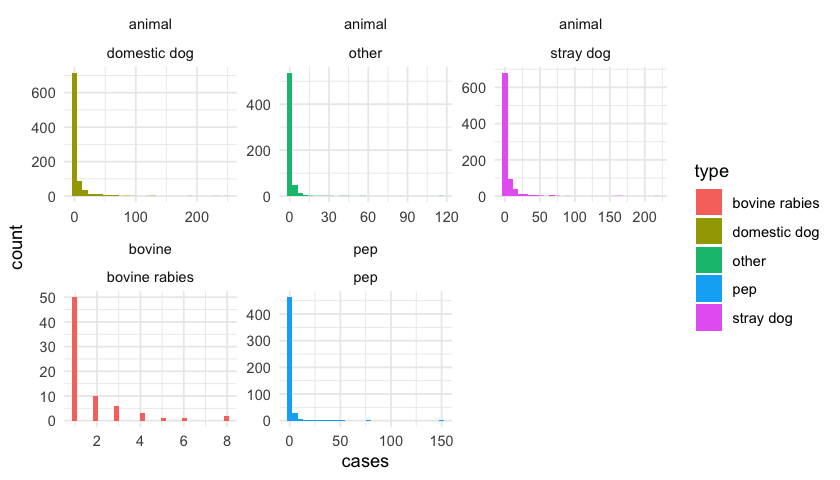

In [42]:
sizing(7, 4)
all3 %>%
    ggplot(aes(cases, fill = type)) +
    geom_histogram() +
    facet_wrap(~src+type, scales = 'free')

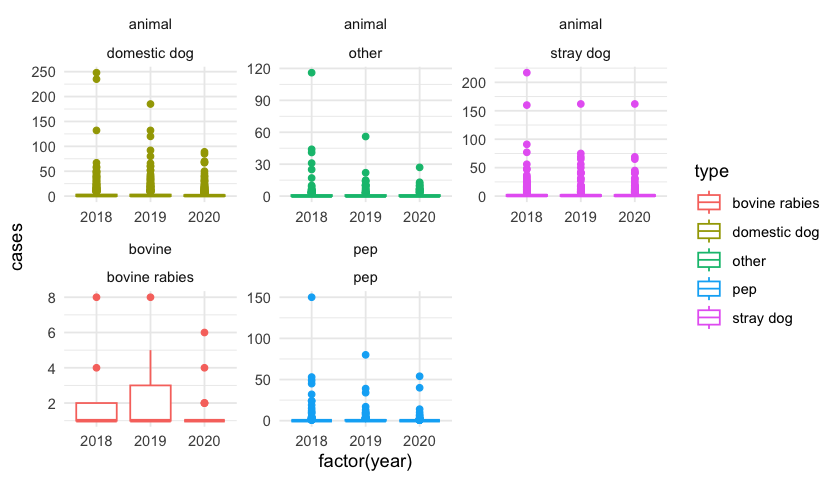

In [48]:
all3 %>%
    ggplot(aes(factor(year), cases, color = type)) +
    geom_boxplot() +
    facet_wrap(~ src + type, scales = "free")

# Merge latlon to data

In [26]:
bovine %>%
    left_join(h_units, 'municipality')

state,municipality,cases,year,type,medical_unit,lat,lon
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
chiapas,VILLA CORZO,2,2018,bovine rabies,FRANCISCO MURGUÍA,15.9633,-93.1928
chiapas,VILLA CORZO,2,2018,bovine rabies,1O. DE MAYO,16.1492,-93.1143
chiapas,VILLA CORZO,2,2018,bovine rabies,REVOLUCIÓN MEXICANA,16.1699,-93.0765
chiapas,VILLA CORZO,2,2018,bovine rabies,VALLE MORELOS,16.1362,-92.9978
chiapas,VILLA CORZO,2,2018,bovine rabies,NUEVO VICENTE GUERRERO,16.039,-92.9787
chiapas,VILLA CORZO,2,2018,bovine rabies,IGNACIO ZARAGOZA (VILLA CORZO),15.9544,-93.225
chiapas,VILLA CORZO,2,2018,bovine rabies,SIERRA MORENA,16.1506,-93.5874
chiapas,VILLA CORZO,2,2018,bovine rabies,MONTERREY (VILLA CORZO),16.0592,-93.368
chiapas,VILLA CORZO,2,2018,bovine rabies,QUERETARO,16.1847,-93.2675
